In [ ]:
!nvidia-smi

Thu May 30 13:26:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AFfajh1HYs27ompNBs97")
project = rf.workspace("fishes").project("fish-dataset-8co94")
version = project.version(1)
dataset = version.download("yolov8-obb")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.4/779.4 kB 3.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!pip install pyyaml

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 172MB/s]


In [ ]:
import yaml

# Define your configuration data as a Python dictionary
config = {
    'path': '/content/Fish-Dataset-1',
    'train': 'train/images',  # train images (relative to 'path')
    'val': 'valid/images',      # val images (relative to 'path')
    'nc': 1,                  # Number of classes
    'names': ['Fish'],        # Class names
    # 'fl_gamma': 2.0         # Uncomment this line if needed
}

# Define the file path where you want to save the YAML file
yaml_file_path = '/content/Fish-Dataset-1/data.yaml'  # Update with your desired path and file name

# Write the YAML data to the file
with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(config, yaml_file)

print(f"YAML configuration file saved at: {yaml_file_path}")

YAML configuration file saved at: /content/Fish-Dataset-1/data.yaml


In [ ]:
results = model.train(data='/content/Fish-Dataset-1/data.yaml',
                      epochs=12,
                      imgsz=640,
                      pretrained=True,
                      name="fish",
                      patience=35,
                      flipud=0.5,
                      batch=32,
                      optimizer='SGD',
                      augment=True
                      )

Ultralytics YOLOv8.2.26 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Fish-Dataset-1/data.yaml, epochs=12, time=None, patience=35, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=fish, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 15.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 74.1MB/s]
Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/Fish-Dataset-1/train/labels... 260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<00:00, 651.40it/s]


train: New cache created: /content/Fish-Dataset-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Fish-Dataset-1/valid/labels... 37 images, 0 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<00:00, 357.49it/s]


val: New cache created: /content/Fish-Dataset-1/valid/labels.cache
Plotting labels to runs/detect/fish/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/fish
Starting training for 12 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/12      8.04G      2.174      4.491      2.027        111        640:  89%|████████▉ | 8/9 [00:07<00:00,  1.40it/s]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
       1/12      8.05G      2.209      4.457      2.025         21        640: 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]

                   all         37         83     0.0287     0.0723     0.0102    0.00502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/12      7.94G      2.088      3.356      1.962         15        640: 100%|██████████| 9/9 [00:04<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         37         83      0.419      0.337      0.297      0.193


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/12      7.89G      2.004      2.559      2.067          5        640: 100%|██████████| 9/9 [00:10<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         37         83      0.595      0.386      0.441      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/12      7.89G      1.771      1.878      1.767          5        640: 100%|██████████| 9/9 [00:04<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         37         83      0.526      0.398      0.413      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/12      7.88G      1.803      1.691      1.699          7        640: 100%|██████████| 9/9 [00:04<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         37         83      0.773      0.482      0.585      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/12       7.9G      1.833      1.562      1.738          8        640: 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         37         83      0.748      0.482      0.592      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/12      7.89G      1.717      1.452      1.644          4        640: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         37         83      0.749       0.61      0.669      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/12      7.93G      1.611      1.273      1.553          4        640: 100%|██████████| 9/9 [00:04<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         37         83      0.726      0.639      0.707      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/12      7.89G      1.658      1.336       1.54          8        640: 100%|██████████| 9/9 [00:04<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         37         83      0.777      0.614      0.732      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/12      8.04G      1.664      1.248      1.563          9        640: 100%|██████████| 9/9 [00:03<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         37         83      0.726      0.671      0.761      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/12      7.88G      1.654      1.242      1.529          8        640: 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         37         83      0.822      0.687      0.769      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/12      7.93G      1.616      1.186      1.498          6        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         37         83      0.906      0.687      0.833      0.486



12 epochs completed in 0.027 hours.
Optimizer stripped from runs/detect/fish/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/fish/weights/best.pt, 22.5MB

Validating runs/detect/fish/weights/best.pt...
Ultralytics YOLOv8.2.26 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


                   all         37         83      0.785      0.747      0.811      0.486
Speed: 0.2ms preprocess, 16.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/fish


In [ ]:
model = YOLO('/content/runs/detect/fish/weights/best.pt')
results = model.val()
for i in [0.25,0.15,0.05]:
  results = model.val(name= f'cofidence: {i}', conf= i , iou=0.8)

Ultralytics YOLOv8.2.26 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/Fish-Dataset-1/valid/labels.cache... 37 images, 0 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]


                   all         37         83      0.907      0.706      0.832      0.487
Speed: 0.3ms preprocess, 26.4ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/val
Ultralytics YOLOv8.2.26 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Fish-Dataset-1/valid/labels.cache... 37 images, 0 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]


                   all         37         83      0.833      0.687      0.808      0.515
Speed: 0.7ms preprocess, 10.4ms inference, 0.1ms loss, 6.7ms postprocess per image
Results saved to runs/detect/cofidence: 0.25
Ultralytics YOLOv8.2.26 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Fish-Dataset-1/valid/labels.cache... 37 images, 0 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]


                   all         37         83      0.833      0.687      0.805      0.504
Speed: 0.4ms preprocess, 10.8ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/cofidence: 0.15
Ultralytics YOLOv8.2.26 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Fish-Dataset-1/valid/labels.cache... 37 images, 0 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


                   all         37         83      0.833      0.687      0.802      0.489
Speed: 0.4ms preprocess, 10.5ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/cofidence: 0.05


In [ ]:
model = YOLO('/content/runs/detect/fish/weights/best.pt')

In [ ]:
import pandas as pd
import numpy as np
import PIL
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
warnings.simplefilter('ignore')

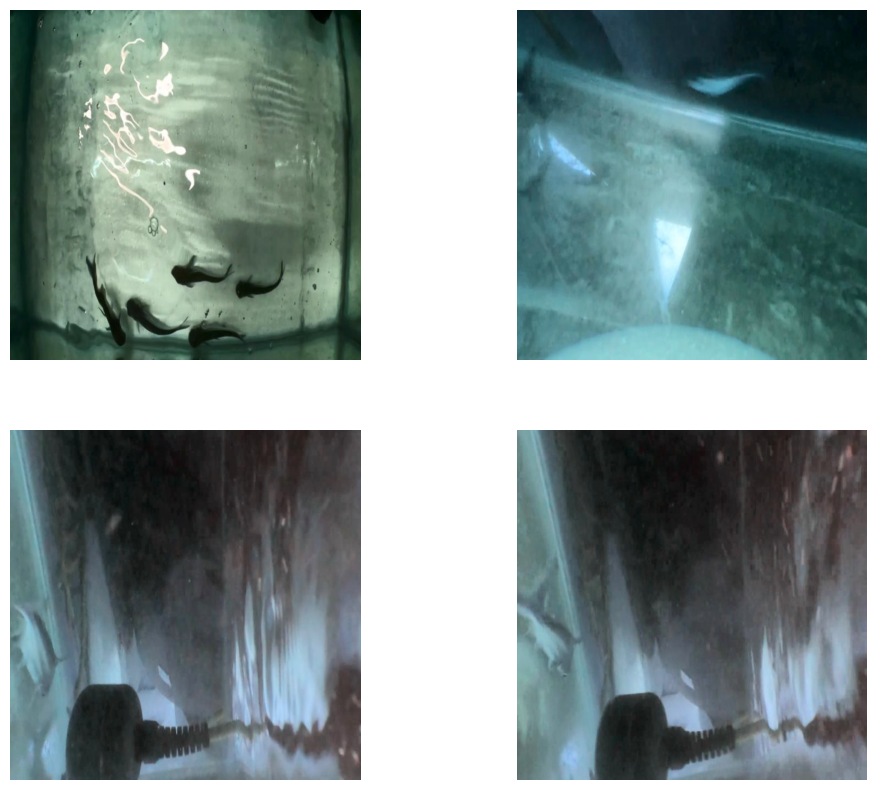

In [ ]:
root_path = '/content/Fish-Dataset-1/valid/images/*'
num_samples = 4
images_data = glob(root_path)
random_image = random.sample(images_data, num_samples)

plt.figure(figsize=(12,10))
for i in range(num_samples):
    plt.subplot(2,2,i+1)
    plt.imshow(cv2.imread(random_image[i]))
    plt.axis('off')

In [ ]:
images = []
for i in range(num_samples):
    yolo_outputs = model.predict(random_image[i])
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names
    print('')
    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        print(f'In this image {len(box)} fish has been detected.')
        print(f'Fish {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')

    # Store the image in the 'images' list
    images.append(output.plot()[:, :, ::-1])


image 1/1 /content/Fish-Dataset-1/valid/images/motion_keyframe_farneback_104_jpg.rf.5bd5e166493acfd171ad605c8801c9bb.jpg: 640x640 5 Fishs, 47.2ms
Speed: 2.4ms preprocess, 47.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

In this image 5 fish has been detected.
Fish 1 is: Fish
Coordinates are: [211.38803100585938, 524.1767578125, 328.1676330566406, 605.153564453125]
Confidence is: 0.82
-------
In this image 5 fish has been detected.
Fish 2 is: Fish
Coordinates are: [138.12588500976562, 445.283447265625, 212.20169067382812, 615.0091552734375]
Confidence is: 0.82
-------
In this image 5 fish has been detected.
Fish 3 is: Fish
Coordinates are: [324.5028076171875, 562.9896240234375, 431.003662109375, 621.5997314453125]
Confidence is: 0.76
-------
In this image 5 fish has been detected.
Fish 4 is: Fish
Coordinates are: [412.5594482421875, 456.9945068359375, 501.1756591796875, 530.2593994140625]
Confidence is: 0.72
-------
In this image 5 fish has been detected.
Fish 5

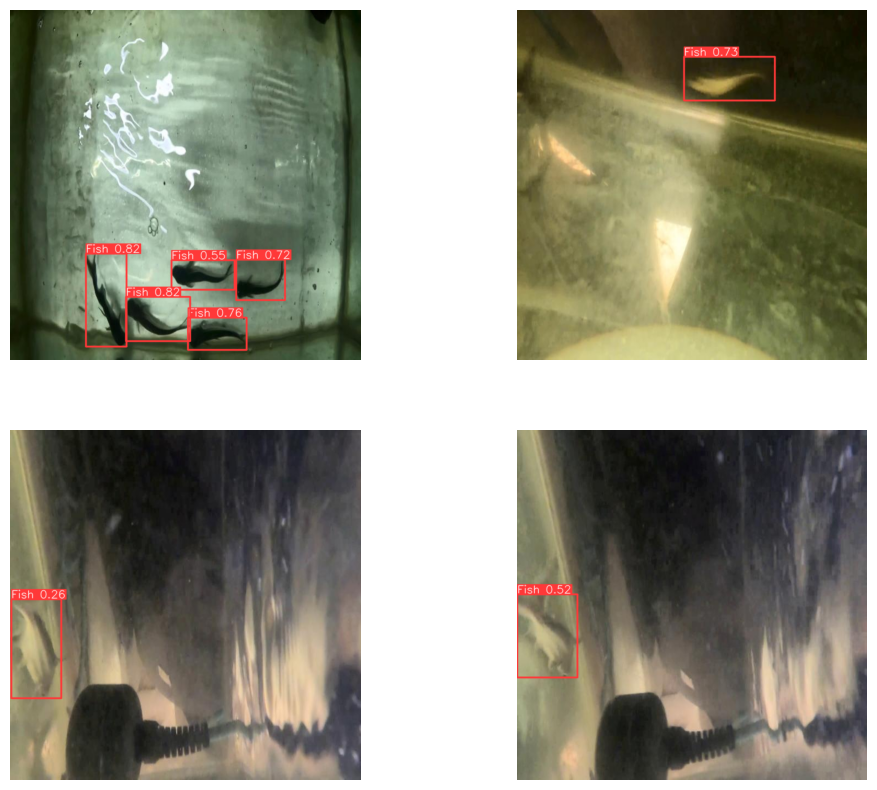

In [ ]:
plt.figure(figsize=(12,10))
for i, img in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')

In [ ]:
result = pd.read_csv('/content/runs/detect/fish/results.csv')
result.head()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,2.2095,4.4566,2.0250,0.02873,0.07229,0.01017,0.00502,1.6457,3.9032,1.7901,0.092800,0.000800,0.000800
1,2,2.0881,3.3559,1.9616,0.41949,0.33735,0.29730,0.19290,1.4556,2.2313,1.5925,0.084560,0.001560,0.001560
2,3,2.0040,2.5593,2.0667,0.59472,0.38554,0.44092,0.27082,1.4560,1.9024,1.5944,0.076171,0.002171,0.002171
3,4,1.7706,1.8779,1.7671,0.52635,0.39759,0.41278,0.23551,1.6074,2.0803,1.6205,0.067634,0.002634,0.002634
4,5,1.8028,1.6913,1.6989,0.77303,0.48193,0.58518,0.29502,1.6723,1.6500,1.5130,0.058948,0.002948,0.002948


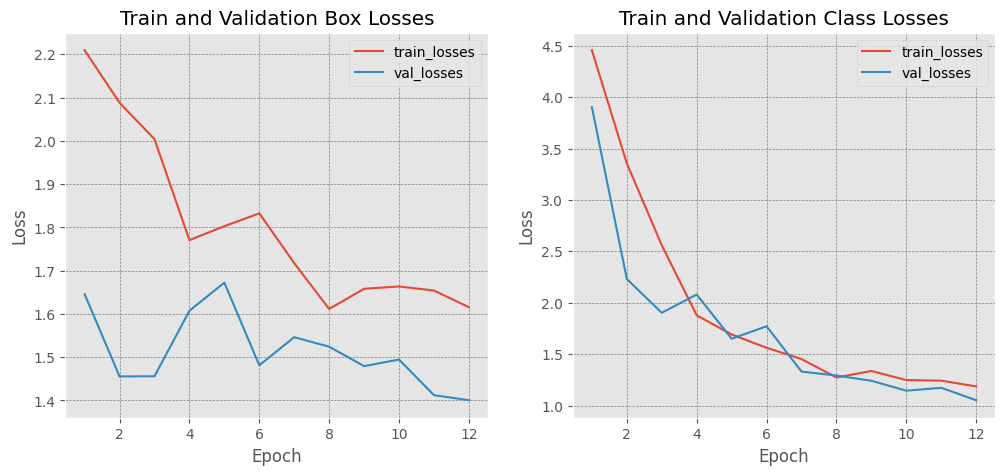

In [ ]:
# Remove leading and trailing spaces from column names
result.columns = result.columns.str.strip()

epoch_column = result['epoch']
box_train_losses = result['train/box_loss']
box_val_losses = result['val/box_loss']
cls_train_losses = result['train/cls_loss']
cls_val_losses = result['val/cls_loss']

plt.figure(figsize=(12,5))
plt.style.use('ggplot')  # You can choose a style you prefer
plt.subplot(1,2,1)
plt.plot(epoch_column, box_train_losses, label='train_losses')
plt.plot(epoch_column, box_val_losses, label='val_losses')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')# Add a grid
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Box Losses')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch_column, cls_train_losses, label='train_losses')
plt.plot(epoch_column, cls_val_losses, label='val_losses')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')# Add a grid
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Class Losses')
plt.legend()
plt.show()

(-0.5, 2399.5, 1199.5, -0.5)

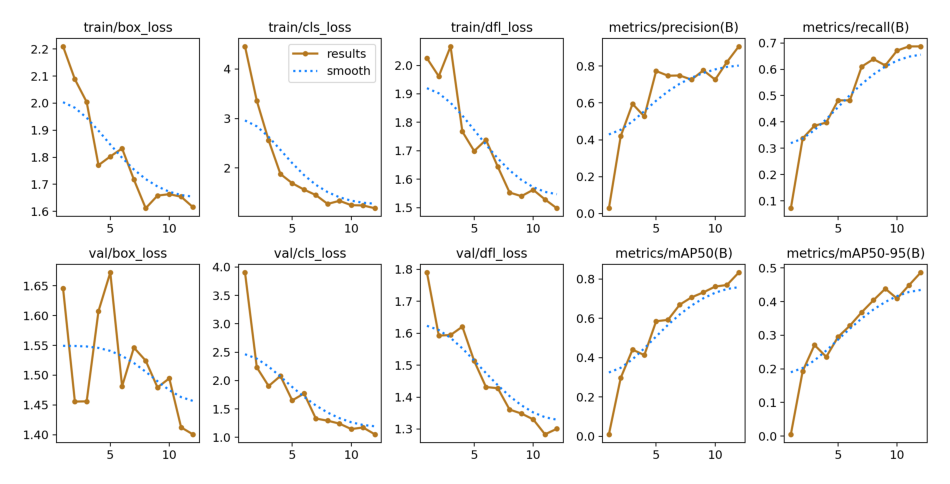

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.imread('/content/runs/detect/fish/results.png'))
plt.axis('off')

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/runs/detect/fish/weights/best.pt')

In [ ]:
import cv2
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('/content/runs/detect/fish/weights/best.pt')

# Open the video file
video_path = "/content/vdo3.mp4"
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
output_path = "/content/output_video.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # or 'XVID'
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Write the annotated frame to the output video
        out.write(annotated_frame)
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture and writer objects
cap.release()
out.release()



0: 384x640 1 Fish, 11.9ms
Speed: 2.9ms preprocess, 11.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Fish, 23.2ms
Speed: 3.5ms preprocess, 23.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Fish, 10.8ms
Speed: 3.4ms preprocess, 10.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Fishs, 10.8ms
Speed: 3.3ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Fishs, 10.9ms
Speed: 3.0ms preprocess, 10.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Fishs, 10.8ms
Speed: 3.9ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Fishs, 10.8ms
Speed: 3.2ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Fishs, 10.8ms
Speed: 3.1ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: